In [44]:
from Similarity.CountrySimilarity import similar_movies_base_country_score
from Similarity.Crewsimilarity import similar_movies_base_actors_score
from Similarity.DescriptionSimilarity import similar_movies_base_description_score
from Similarity.GenreSimilarity import similar_movies_base_genre_score
import random

trainintime = 40
min_movies = 2
max_movies = 60

# Initialize dictionaries to store average scores and movie lengths
average_actors_scores = {}
average_country_scores = {}
average_genre_scores = {}
average_description_scores = {}

for i in range(trainintime):
    # Define the number of watched movies
    num_watched_movies = random.randint(min_movies, max_movies)
    
    # Generate random movie IDs and scores
    watched_movies = [(str(random.randint(1, 10000)), random.uniform(0.4, 1)) for _ in range(num_watched_movies)]

    # Initialize dictionaries to store similarity scores for each dimension
    description_dict = {}
    genre_dict = {}
    actors_dict = {}
    country_dict = {}

    # Call each similarity function to get the list of similar movies for each dimension
    for movie_id, importance in watched_movies:
        description_similarity = similar_movies_base_description_score(movie_id)
        genre_similarity = similar_movies_base_genre_score(movie_id)
        actors_similarity = similar_movies_base_actors_score(movie_id)
        country_similarity = similar_movies_base_country_score(movie_id)

        # Store the similarity scores in the dictionaries
        description_dict[movie_id] = dict(description_similarity)
        genre_dict[movie_id] = dict(genre_similarity)
        actors_dict[movie_id] = dict(actors_similarity)
        country_dict[movie_id] = dict(country_similarity)

    # Initialize variables to store the total scores for each dimension
    total_description_score = 0
    total_genre_score = 0
    total_actors_score = 0
    total_country_score = 0
    importancedot =[]
    # Accumulate scores for each dimension
    for i in range(len(watched_movies)):
        movie_id_i, importance_i = watched_movies[i]

        for j in range(len(watched_movies)):
            if i != j:  # Exclude self-comparison
                movie_id_j, importance_j = watched_movies[j]
                importanceij=importance_i*importance_j
                # Accumulate scores for each dimension
                total_description_score += description_dict[movie_id_i].get(int(movie_id_j), 0) * importanceij
                total_genre_score += genre_dict[movie_id_i].get(movie_id_j, 0) * importanceij
                total_actors_score += actors_dict[movie_id_i].get(movie_id_j, 0) * importanceij
                total_country_score += country_dict[movie_id_i].get(int(movie_id_j), 1) * importanceij
                importancedot.append(importanceij)
    
    # Calculate the average scores for each dimension
    num_pairs = len(watched_movies) * (len(watched_movies) - 1)
    importancedotsum = sum(importancedot)
    print(importancedotsum)
    average_description_score = total_description_score / importancedotsum
    average_genre_score = total_genre_score / importancedotsum
    average_actors_score = total_actors_score / importancedotsum
    average_country_score = total_country_score / importancedotsum

    # Store the pairs in the dictionaries
    average_actors_scores[i] = (average_actors_score, len(watched_movies))
    average_country_scores[i] = (average_country_score, len(watched_movies))
    average_description_scores[i] = (average_description_score, len(watched_movies))
    average_genre_scores[i] = (average_genre_score, len(watched_movies))

# Print the final average scores for each dimension
print("Average Description Score:", min(average_description_scores.values()), max(average_description_scores.values()))
print("Average Genre Score:", min(average_genre_scores.values()), max(average_genre_scores.values()))
print("Average Actors Score:", min(average_actors_scores.values()), max(average_actors_scores.values()))
print("Average Country Score:", min(average_country_scores.values()), max(average_country_scores.values()))


422.1625366251847
157.57875783834476
145.82470532465112
610.3869271046769
1316.7139732875648
242.03732079924202
1781.748188142495
79.70433661075396
912.3469551259302
1099.2603437807165
82.73196339707347
1719.205917453673
412.6400029323879
1547.9524478840835
863.440685439446
449.4369158719114
1248.5673637033804
351.44302276071
17.606995782090728
58.12770436863727
491.0466937980916
16.956066205918386
1154.3773400673354
166.6605714555264
1425.6358448310903
140.12416034320069
1763.2768531701374
299.1640976282729
538.4199331078258
774.8670074262319
425.4836654237193
158.89302166933481
5.1820323272051825
852.8518172213171
650.2979465630982
1531.0873297993219
435.99593990674657
259.0607695216429
200.59746365284056
523.9605001826226
Average Description Score: (0.49248018349169365, 32) (0.848378399610906, 4)
Average Genre Score: (0.02534712027045981, 4) (0.1800668664697535, 57)
Average Actors Score: (0.0, 4) (0.009912877251699717, 19)
Average Country Score: (1.0, 4) (1.0, 60)


0.49248018349169365
0.848378399610906
0.0
0.009912877251699717
1.0
1.0
0.02534712027045981
0.1800668664697535


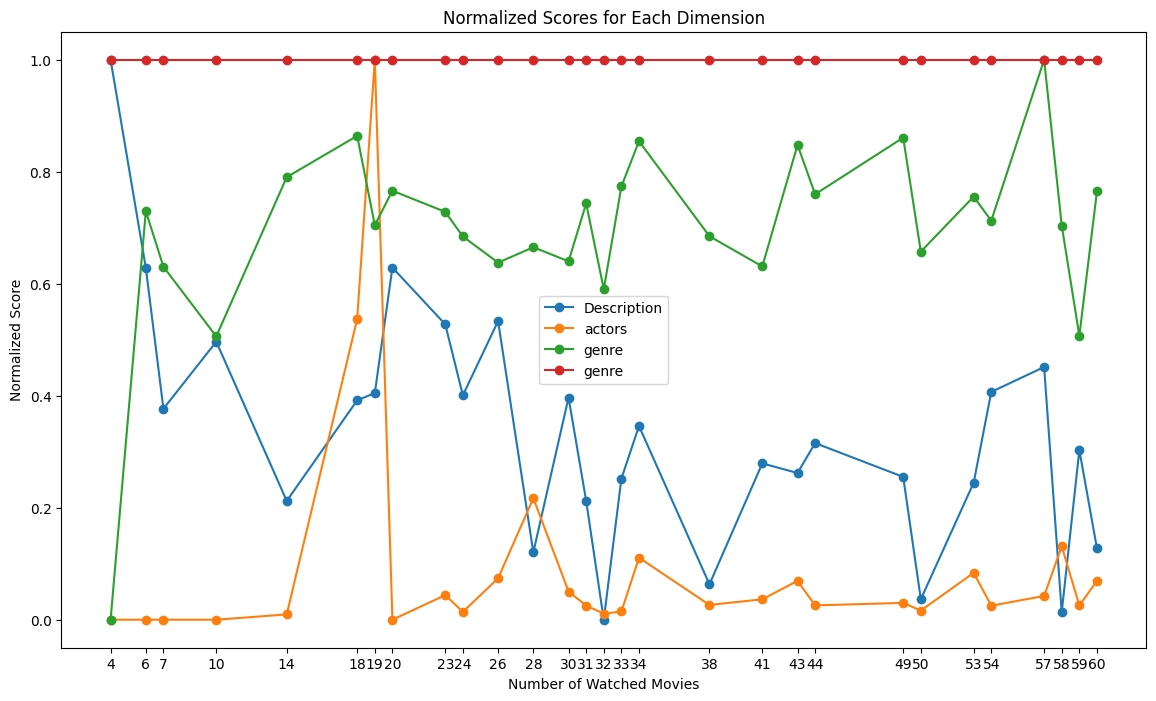

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_data_for_plot(average_n_scores):
    """Normalizes scores, sorts data, and extracts x_values and y_values for plotting.

    Args:
        average_actors_scores (dict): Dictionary containing scores and num_movies as values.

    Returns:
        tuple: (x_values, y_values)
    """

    min_score, _ = min(average_n_scores.values())
    max_score, _ = max(average_n_scores.values())
    print(min_score)
    print(max_score)
    for key, (score, num_movies) in average_n_scores.items():
        if max_score != min_score:  # Check for non-zero denominator
            normalized_score = (score - min_score) / (max_score - min_score)
            average_n_scores[key] = (normalized_score, num_movies)
        else:
            average_n_scores[key] = (score, num_movies)
    sorted_data = sorted(average_n_scores.items(), key=lambda x: x[1][1])
    x_values = [num_movies for _, (_, num_movies) in sorted_data]
    y_values = [score for _, (score, _) in sorted_data]

    return x_values, y_values
# Example usage:
x_values_description, y_values_description = prepare_data_for_plot(average_description_scores)
x_values_actors, y_values_actors = prepare_data_for_plot(average_actors_scores)
x_values_country, y_values_country = prepare_data_for_plot(average_country_scores)
x_values_genre, y_values_genre = prepare_data_for_plot(average_genre_scores)

# Create the plot
plt.figure(figsize=(14, 8))

# Plot all lines with distinct markers and linestyles
plt.plot(x_values_description, y_values_description, label='Description', marker='o', linestyle='-')
plt.plot(x_values_actors, y_values_actors, label='actors', marker='o', linestyle='-')
plt.plot(x_values_genre, y_values_genre, label='genre', marker='o', linestyle='-')
plt.plot(x_values_country, y_values_country, label='county', marker='o', linestyle='-')
# Add labels and title
plt.xlabel('Number of Watched Movies')
plt.ylabel('Normalized Score')  # Indicate scores are normalized
plt.title('Normalized Scores for Each Dimension')
plt.xticks(x_values_description)  # Set x-axis ticks using description x_values
plt.legend()

plt.show()